In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Data preprocessing 
flat_sizes = np.array([1600,1260,1800,600,850,920,1090,890,1340,1650])/100  #scaling the flat area (if not standarised the gradient was blowing up for gradient descent algo)
bedrooms_number = np.array([3,2,4,1,2,2,2,2,3,2])
prices = np.array([8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4])

X = np.zeros((10,3)) #Design Matrix
X[:,0] = flat_sizes
X[:,1] = bedrooms_number
X[:,2] = np.ones((10,))

y = prices #Flat prices

# 2.2 a

The Linear regression model is given by,
$$y = \theta_1 x_1 + \theta_2 x_2 + \theta_3 + \epsilon$$
where $x_1$ is flat area(in 1000 sq feet), $x_2$ is number of bedrooms and $y$ is the flat price.

The Closed form solution is given by $\theta^* = (X^TX)^{-1}X^{T}y$

In [37]:
# Least square closed form solution #
least_sq_fitted_model = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Obtained parameters:{least_sq_fitted_model[0]},{least_sq_fitted_model[1]},{least_sq_fitted_model[2]}")

Obtained parameters:0.36295281930338885,1.6781809882460257,-1.9252501046064898


Closed form solution model is $ y = 0.363 x_1 + 1.678 x_2 - 1.925 + \epsilon$.

Note: $\frac{\partial y}{\partial x_1} > 0$ and $\frac{\partial y}{\partial x_2} > 0$. In order to compute the least square estimation range it is enough to consider the extreme points namely $(950,2)$ and $(1050,3)$ for our problem.

In [38]:
# Estimated range of bank loan needed using least square estimation #
model_prediction = lambda X,para : para[0]*X[0] + para[1]*X[1] + para[2]
lower_limit = model_prediction((9.50,2),least_sq_fitted_model)
upper_limit = model_prediction((10.50,3),least_sq_fitted_model)
print(f"Range of Bank Loan in million needed is :[{lower_limit},{upper_limit}]")


Range of Bank Loan in million needed is :[4.879163655267756,6.92029746281717]


# 2.2 b

For Gradient descent approach the following cost function is used where $\bf \hat y = X\theta^T$,
$$\bf J(\theta) = (y - \hat y)^T (y - \hat y)$$
If we want to incorporate varying step sizes($\alpha$) the $\alpha$ parameter for the ith iteration comes out to be,
$$\alpha(\theta^i) = \frac{1}{2} \frac{\nabla J(\theta^i)^T\nabla J(\theta^i)}{\nabla J(\theta^i)^TX^TX\nabla J(\theta^i)}$$

In [39]:
#Gradient descent approach 
grad_cost = lambda para,X,y : 2*((X @ para - y).T @ X) ##gradient vector of cost function

grad_norm = lambda grad : np.sqrt(grad.T @ grad) ##computes norm of gradient vector

# X-design matrix, y-price,initial_para-takes list of initial guess of parameters
# step_size_mode- if not 'varying' then it takes alpha as 6*10e-5 (manually change it if needed)
def grad_descent(X,y,initial_para,max_iter = 150000,step_size_mode = 'varying'):
    theta_1,theta_2,theta_3 = initial_para[0],initial_para[1],initial_para[2]
    gradient = grad_cost((theta_1,theta_2,theta_3),X,y)
    iter = 0
    alpha = 6*10e-5
    para_list = [np.array([theta_1,theta_2,theta_3])]
    while(iter < max_iter and grad_norm(gradient) > 10e-5): ##threshold for termination
        iter += 1
        if(step_size_mode == 'varying'):
            alpha = 0.5*(gradient.T @ gradient)/(gradient @ (X.T @ X) @ gradient.T)
        temp1 = theta_1 - alpha*gradient[0]
        temp2 = theta_2 - alpha*gradient[1]
        temp3 = theta_3 - alpha*gradient[2]
        theta_1 = temp1
        theta_2 = temp2
        theta_3 = temp3
        gradient = grad_cost((theta_1,theta_2,theta_3),X,y)
        para_list.append(np.array([theta_1,theta_2,theta_3]))
    print(f"Obtained Parameters : {theta_1},{theta_2},{theta_3} with {iter} iterations")    
    return [theta_1,theta_2,theta_3],np.array(para_list)


In [40]:
# Constant step size case
grad_fitted_model0,para_iter_list = grad_descent(X,y,[0,0,0],step_size_mode='constant')

Obtained Parameters : 0.36295044327878595,1.6781700932341663,-1.925191624545418 with 10441 iterations


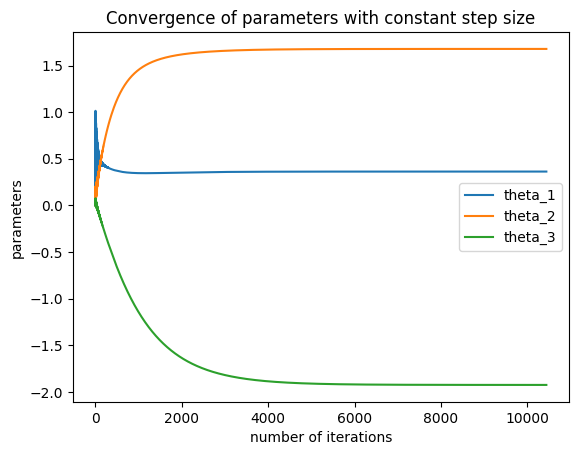

In [41]:
# Convergence of parameters plot with constant step size
x = np.linspace(0,len(para_iter_list)+1,len(para_iter_list))
plt.figure()
plt.plot(x,para_iter_list[:,0],label = 'theta_1')
plt.plot(x,para_iter_list[:,1],label = 'theta_2')
plt.plot(x,para_iter_list[:,2],label = 'theta_3')
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('parameters')
plt.title('Convergence of parameters with constant step size')
plt.show()

In [42]:
# Varying step size case
grad_fitted_model,para_iter_list1 = grad_descent(X,y,[0,0,0],step_size_mode='varying')

Obtained Parameters : 0.3629504636900115,1.6781701731746583,-1.9251920502336197 with 435 iterations


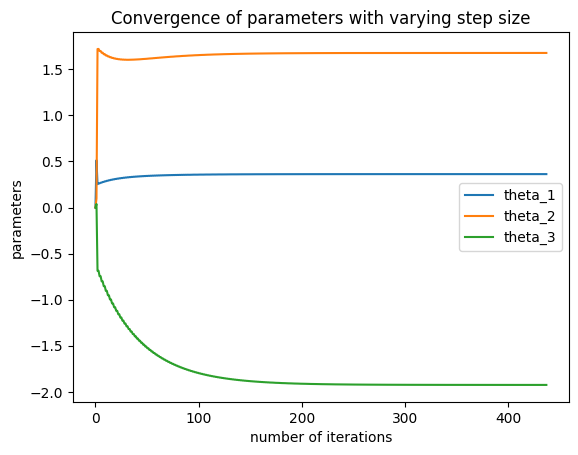

In [43]:
# Convergence of parameters plot with varying step size
x = np.linspace(0,len(para_iter_list1)+1,len(para_iter_list1))
plt.figure()
plt.plot(x,para_iter_list1[:,0],label = 'theta_1')
plt.plot(x,para_iter_list1[:,1],label = 'theta_2')
plt.plot(x,para_iter_list1[:,2],label = 'theta_3')
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('parameters')
plt.title('Convergence of parameters with varying step size')
plt.show()

In [44]:
# Estimated range of bank loan needed using least square estimation(gradient descent)#
lower_limit = model_prediction((9.50,2),grad_fitted_model)
upper_limit = model_prediction((10.50,3),grad_fitted_model)
print(f"Range of Bank Loan in million needed is :[{lower_limit},{upper_limit}]")

Range of Bank Loan in million needed is :[4.879177701170806,6.920298338035475]


# 2.2 c

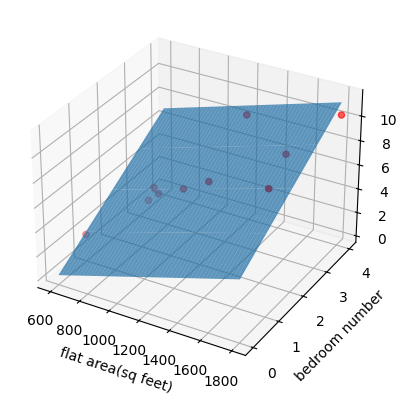

In [46]:
# Least Square estimation of bank loan using closed form solution
# Ploting the fitted model from closed from solution which will be a plane.
xx, yy = np.meshgrid(range(600,1800),range(0,5))
zz = least_sq_fitted_model[0]*xx/100 + least_sq_fitted_model[1]*yy + least_sq_fitted_model[2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.7)
ax.set_xlabel('flat area(sq feet)')
ax.set_ylabel('bedroom number')
ax.set_zlabel('flat price')
#Ploting the flat prices as a function of flat size and number of bedrooms
ax.scatter(X[:,0]*100,X[:,1],y,c=['red'])
# Note the z-axis in the plot correspond to the flat prices


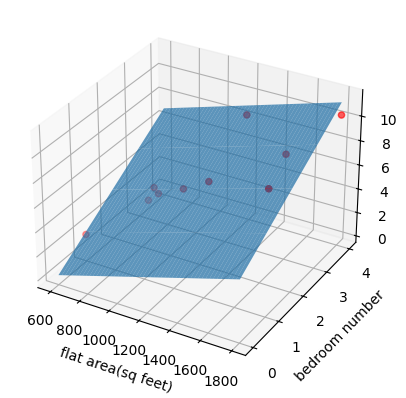

In [47]:
# Least Square estimation of bank loan using gradient descent solution(with varying step size)
zz = grad_fitted_model[0]*xx/100 + grad_fitted_model[1]*yy + grad_fitted_model[2]
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.7)
ax.set_xlabel('flat area(sq feet)')
ax.set_ylabel('bedroom number')
ax.set_zlabel('flat price')

ax.scatter(X[:,0]*100,X[:,1],y,c=['red'])


# 2.2 d

In [51]:
#Data preprocessing
data = pd.read_csv('ex1data2.txt',header = None)
data.columns = ['flat_area','bedroom_number','price']
data = data.iloc[np.random.permutation(len(data))] #shuffling the data set for cross validation
#Scaling the flat_area by 1/100 (for convergence of gradient descent approach)
X_data = np.array([data['flat_area']/100,data['bedroom_number'],np.ones((len(data)))]).T #Design matrix
y_data = np.array(data['price'])/10e6 #flat price(in million)

In [52]:
model_pred_values = lambda theta,X : X[:,0]*theta[0] + X[:,1]*theta[1] + X[:,2]*theta[0] #computes predicted values from design matrix
#implementing 10 fold cross validation
k = 10 #folds
mse_list = []
para_list = []
for i in range(10):
    X_train,y_train = np.concatenate([X_data[0:i*5],X_data[5*i+5:]]),np.concatenate([y_data[0:i*5],y_data[5*i+5:]])
    X_test,y_test = X_data[5*i:5*i+5],y_data[5*i:5*i+5]
    para,l = grad_descent(X_train,y_train,[0,0,0])
    pred_values = model_pred_values(para,X_test)
    mse = (pred_values - y_test).T @ (pred_values - y_test)/len(pred_values)
    mse_list.append(mse)
    para_list.append(para)

print(f"The mean squared error for the 10 fold cross validation is {np.mean(mse_list)}")
     

Obtained Parameters : 0.001347742326885367,-0.0008047535344796321,0.009668255383267122 with 5467 iterations
Obtained Parameters : 0.0014003835354233184,-0.0010818934495374706,0.009461225869518588 with 6445 iterations
Obtained Parameters : 0.0013601822703233175,-0.00033668429848659483,0.00800718191723879 with 3015 iterations
Obtained Parameters : 0.001346658196102502,-0.00051520590737206,0.008442486311462813 with 4277 iterations
Obtained Parameters : 0.0013961353347188455,-0.0009429316782319682,0.009067155168136772 with 7087 iterations
Obtained Parameters : 0.001397934662711276,-0.0006399409692610023,0.008077694752171767 with 5253 iterations
Obtained Parameters : 0.0014791957029568592,-0.0016230837353480606,0.010208204367941747 with 22313 iterations
Obtained Parameters : 0.0013702790191998837,-0.0011892224651619,0.010525465924746569 with 4173 iterations
Obtained Parameters : 0.001379562859414108,-0.0007204856798250431,0.008550189953314165 with 6009 iterations
Obtained Parameters : 0.001